# Import Dependencies

In [224]:
import pandas as pd
import matplotlib.pyplot as plt



SAT= pd.read_excel(r'C:\Users\Zaid Al-Saffar\Desktop\Project HGTV\SAT.xlsx')
crime_10= pd.read_csv(r'C:\Users\Zaid Al-Saffar\Desktop\Project HGTV\crime_10.csv')
plot_bar1= pd.read_excel(r'C:\Users\Zaid Al-Saffar\Desktop\Project HGTV\plot_bar1.xlsx')

crime_10
plot_bar1


,Row Labels,Grand Total_Housing,Grand Total_Income,Score
0,Modoc County,126564.58,38456.50,10
1,Kern County,202348.44,48985.00,9
2,Sutter County,241499.42,51723.75,8
3,Kings County,222999.40,47299.00,7
4,Imperial County,212545.38,41804.50,6
5,Tulare County,218202.33,42597.75,5
6,Merced County,224596.40,43129.00,4
7,San Bernardino County,282924.10,54023.00,3
8,Del Norte County,210577.34,40105.25,2
9,Butte County,229671.54,43681.75,1


In [5]:
to_be_average = SAT[["Percent Meeting ELA Benchmarks", "Percent Meeting Math Benchmarks"]]
to_be_average=to_be_average.dropna()
to_be_average
to_be_average = to_be_average[to_be_average['Percent Meeting ELA Benchmarks'] !='*']

In [87]:
to_be_average.head()

,Name,Grade 12 Enrollment,Number Tested,Number Meeting Current ELA Benchmark,Number Meeting Previous ELA Benchmark,Total Number Meeting ELA Benchmarks,Percent Meeting ELA Benchmarks,Number Meeting Current Math Benchmark,Number Meeting Previous Math Benchmark,Total Number Meeting Math Benchmarks,Percent Meeting Math Benchmarks,SAT Average,Score
8,El Dorado County,2167,921,831,3,834,0.9055,742,3,745,0.8089,0.8572,10
20,Marin County,2473,1186,1073,0,1073,0.9047,857,0,857,0.7226,0.81365,9
28,Nevada County,1940,268,247,0,247,0.9216,189,0,189,0.7052,0.8134,8
30,Placer County,5861,2860,2557,7,2564,0.8965,2027,6,2033,0.7108,0.80365,7
54,Tuolumne County,506,122,110,0,110,0.9016,85,0,85,0.6967,0.79915,6


In [6]:
to_be_average['avg'] = (to_be_average['Percent Meeting ELA Benchmarks'] + to_be_average['Percent Meeting Math Benchmarks'])/2

# Data Cleaning

In [44]:
to_be_average=SAT.dropna()
to_be_average = to_be_average[to_be_average['Percent Meeting ELA Benchmarks'] !='*']
to_be_average['SAT Average'] = (to_be_average['Percent Meeting ELA Benchmarks'] + to_be_average['Percent Meeting Math Benchmarks'])/2
to_be_average= to_be_average.sort_values(by='SAT Average', ascending=False)
to_be_average= to_be_average.head(10)
to_be_average['Score']=range(10,0,-1)
to_be_average


,Name,Grade 12 Enrollment,Number Tested,Number Meeting Current ELA Benchmark,Number Meeting Previous ELA Benchmark,Total Number Meeting ELA Benchmarks,Percent Meeting ELA Benchmarks,Number Meeting Current Math Benchmark,Number Meeting Previous Math Benchmark,Total Number Meeting Math Benchmarks,Percent Meeting Math Benchmarks,SAT Average,Score
8,El Dorado County,2167,921,831,3,834,0.9055,742,3,745,0.8089,0.8572,10
20,Marin County,2473,1186,1073,0,1073,0.9047,857,0,857,0.7226,0.81365,9
28,Nevada County,1940,268,247,0,247,0.9216,189,0,189,0.7052,0.8134,8
30,Placer County,5861,2860,2557,7,2564,0.8965,2027,6,2033,0.7108,0.80365,7
54,Tuolumne County,506,122,110,0,110,0.9016,85,0,85,0.6967,0.79915,6
39,San Luis Obispo County,2874,1137,1000,2,1002,0.8813,811,2,813,0.715,0.79815,5
40,San Mateo County,7357,3956,3411,11,3422,0.865,2865,11,2876,0.727,0.796,4
3,Butte County,2408,657,567,1,568,0.8645,469,1,470,0.7154,0.78995,3
2,Amador County,349,88,79,0,79,0.8977,60,0,60,0.6818,0.78975,2
4,Calaveras County,445,152,131,0,131,0.8618,108,0,108,0.7105,0.78615,1


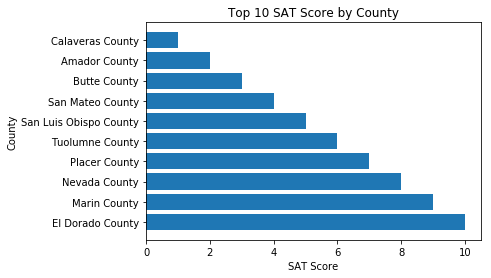

In [225]:
plt.barh(to_be_average.Name,to_be_average.Score)
plt.xticks(rotation=0)
plt.xlabel("SAT Score")
plt.ylabel("County")
plt.title("Top 10 SAT Score by County")
plt.savefig("Top 10 SAT Score by County.png")

In [211]:
to_be_average.to_excel("C:/Users/Zaid Al-Saffar/Desktop/Project HGTV/HGTV_Project.xlsx", header=True)

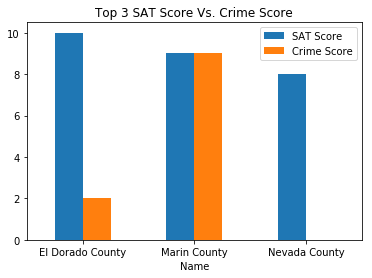

In [217]:
crime_sat= pd.merge(to_be_average,crime_10,how= "outer",left_on="Name", right_on="geo_name")
crime_sat= crime_sat.sort_values(by='Score', ascending=False)
crime_sat= crime_sat.fillna(0).head(3)
crime_sat
crime_sat=crime_sat.set_index('Name')
crime_sat= crime_sat[['Score','score']]
crime_sat.columns=['SAT Score','Crime Score']
img1 = crime_sat.plot(kind="bar", rot=0, title="Top 3 SAT Score Vs. Crime Score").get_figure()
img1.savefig("Top 3 SAT Score Vs. Crime Score.png")


In [219]:
plot_sat= pd.merge(to_be_average,plot_bar1,how="outer",left_on="Name", right_on='Row Labels')
plot_sat=plot_sat.rename({"Score_x":'SAT Score',"Score_y": "Home Ratio Score" },axis=1)
plot_sat=plot_sat.sort_values(by='SAT Score', ascending=False)
plot_sat=plot_sat.head(3)
plot_sat=plot_sat.fillna(0)
plot_sat


,Name,Grade 12 Enrollment,Number Tested,Number Meeting Current ELA Benchmark,Number Meeting Previous ELA Benchmark,Total Number Meeting ELA Benchmarks,Percent Meeting ELA Benchmarks,Number Meeting Current Math Benchmark,Number Meeting Previous Math Benchmark,Total Number Meeting Math Benchmarks,Percent Meeting Math Benchmarks,SAT Average,SAT Score,Row Labels,Grand Total_Housing,Grand Total_Income,Home Ratio Score
0,El Dorado County,2167.0,921.0,831,3,834,0.9055,742,3,745,0.8089,0.85720,10.0,0,0.0,0.0,0.0
1,Marin County,2473.0,1186.0,1073,0,1073,0.9047,857,0,857,0.7226,0.81365,9.0,0,0.0,0.0,0.0
2,Nevada County,1940.0,268.0,247,0,247,0.9216,189,0,189,0.7052,0.81340,8.0,0,0.0,0.0,0.0


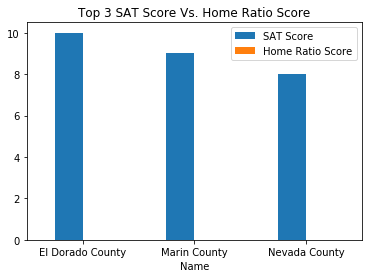

In [220]:
plot_sat=plot_sat.set_index('Name')
plot_sat= plot_sat[['SAT Score','Home Ratio Score']]
img = plot_sat.plot(kind="bar", rot=0, title="Top 3 SAT Score Vs. Home Ratio Score").get_figure()
img.savefig("Top 3 SAT Score Vs. Home Ratio Score.png")
